# **Analyzing Race and Housing Burden in Los Angeles**
## **Elizabeth Shin**
### Mapping racial composition in Los Angeles County will help us to visualize racial composition of neighborhoods that have been impacted by the recent wildfires, offering insight into the demographic disparities that may influence vulnerability to price gouging. *This assignment is an expansion upon assignment 3.*

## Import Race Data
**Import library for data exploration**

In [49]:
import pandas as pd
import plotly.express as px

**Load dataset from ACS2015-2019 (dtype to ensure columns are read as strings)**

In [44]:
df = pd.read_csv(
    'Data/R13799770_SL140-Copy1.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

## Preliminary Inspection
**Size of data

In [20]:
df.shape

(2346, 70)

In [21]:
df.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,PCT_SE_A03001_002,PCT_SE_A03001_003,PCT_SE_A03001_004,PCT_SE_A03001_005,PCT_SE_A03001_006,PCT_SE_A03001_007,PCT_SE_A03001_008
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,NaN,NaN,NaN,NaN,06,037,NaN,NaN,NaN,101110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4283,3347,19,3,331,3,391,189,78.15,0.44,0.07,7.73,0.07,9.13,4.41
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,NaN,NaN,NaN,NaN,06,037,NaN,NaN,NaN,101122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3405,2981,74,15,220,0,48,67,87.55,2.17,0.44,6.46,0.00,1.41,1.97
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,NaN,NaN,NaN,NaN,06,037,NaN,NaN,NaN,101210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6347,4647,198,0,486,0,921,95,73.22,3.12,0.00,7.66,0.00,14.51,1.50
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3874,NaN,NaN,NaN,NaN,06,037,NaN,NaN,NaN,101220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3702,2634,87,0,341,0,497,143,71.15,2.35,0.00,9.21,0.00,13.43,3.86
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3875,NaN,NaN,NaN,NaN,06,037,NaN,NaN,NaN,101300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3884,3350,205,0,194,0,45,90,86.25,5.28,0.00,4.99,0.00,1.16,2.32


## Overwriting default display settings
**Override defaults to see all data**

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
df.sample()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,PCT_SE_A03001_002,PCT_SE_A03001_003,PCT_SE_A03001_004,PCT_SE_A03001_005,PCT_SE_A03001_006,PCT_SE_A03001_007,PCT_SE_A03001_008
1736,06037551000,14000US06037551000,Census Tract 5510,"Census Tract 5510, Los Angeles County, California",ca,140,0,ACSSF,5607,NaN,NaN,NaN,NaN,06,037,NaN,NaN,NaN,551000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7281,4052,172,42,837,0,1871,307,55.65,2.36,0.58,11.5,0.0,25.7,4.22


## Data Types
**Look at all the data types**

In [24]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   object 
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2346 non-null   object 
 14  Geo_COUNTY         2346 non-null   object 
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non

## Assigning Data Types
**Geo-FIPS in detail**

In [25]:
df.Geo_STATE.head()

0    06
1    06
2    06
3    06
4    06
Name: Geo_STATE, dtype: object

In [26]:
df.Geo_COUNTY.head()

0    037
1    037
2    037
3    037
4    037
Name: Geo_COUNTY, dtype: object

**Show columns and non-null values**

In [27]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   object 
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2346 non-null   object 
 14  Geo_COUNTY         2346 non-null   object 
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non

## Delete Null 
**Identify columns that have empty values (isna().all()) and eliminate (dropna)**

In [28]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

In [29]:
df = df.dropna(axis=1,how="all")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   object 
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_STATE          2346 non-null   object 
 10  Geo_COUNTY         2346 non-null   object 
 11  Geo_TRACT          2346 non-null   int64  
 12  SE_A03001_001      2346 non-null   int64  
 13  SE_A03001_002      2346 non-null   int64  
 14  SE_A03001_003      2346 non-null   int64  
 15  SE_A03001_004      2346 non-null   int64  
 16  SE_A03001_005      2346 

In [31]:
df.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008,PCT_SE_A03001_002,PCT_SE_A03001_003,PCT_SE_A03001_004,PCT_SE_A03001_005,PCT_SE_A03001_006,PCT_SE_A03001_007,PCT_SE_A03001_008
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,06,037,101110,4283,3347,19,3,331,3,391,189,78.15,0.44,0.07,7.73,0.07,9.13,4.41
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,06,037,101122,3405,2981,74,15,220,0,48,67,87.55,2.17,0.44,6.46,0.00,1.41,1.97
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,06,037,101210,6347,4647,198,0,486,0,921,95,73.22,3.12,0.00,7.66,0.00,14.51,1.50
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3874,06,037,101220,3702,2634,87,0,341,0,497,143,71.15,2.35,0.00,9.21,0.00,13.43,3.86
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3875,06,037,101300,3884,3350,205,0,194,0,45,90,86.25,5.28,0.00,4.99,0.00,1.16,2.32


## Census Data Dictionary
**Define which columns to keep based on codebook**

In [16]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A03001_001',
                   'SE_A03001_002',
                   'SE_A03001_003',
                   'SE_A03001_004',
                   'SE_A03001_005',
                   'SE_A03001_006',
                   'SE_A03001_007',
                   'SE_A03001_008']
df2 = df[columns_to_keep]

## Rename Columns
**Renaming columns by replacing values with accurate description**

In [17]:
columns = list(df2)
columns

['Geo_FIPS',
 'SE_A03001_001',
 'SE_A03001_002',
 'SE_A03001_003',
 'SE_A03001_004',
 'SE_A03001_005',
 'SE_A03001_006',
 'SE_A03001_007',
 'SE_A03001_008']

In [59]:
df2.columns = ['Census Tract',
               'Total Population',
               'White Alone',
               'Black or African American Alone',
               'American Indian and Alaska Native Alone',
               'Asian Alone',
               'Native Hawaiian and Other Pacific Islander Alone',
               'Some Other Race Alone',
               'Two or More Races']

In [60]:
df2.sample(5)

,Census Tract,Total Population,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races
937,6037291110,4391,1137,2081,25,20,0,1100,28
2201,6037901010,5723,3976,937,35,122,0,489,164
1588,6037533401,5098,3768,0,0,0,0,1322,8
823,6037243100,6772,2509,2057,0,15,63,2078,50
2184,6037900607,3651,2514,538,14,128,0,336,121


In [61]:
print(df2.columns)

Index(['Census Tract', 'Total Population', 'White Alone',
       'Black or African American Alone',
       'American Indian and Alaska Native Alone', 'Asian Alone',
       'Native Hawaiian and Other Pacific Islander Alone',
       'Some Other Race Alone', 'Two or More Races'],
      dtype='object')


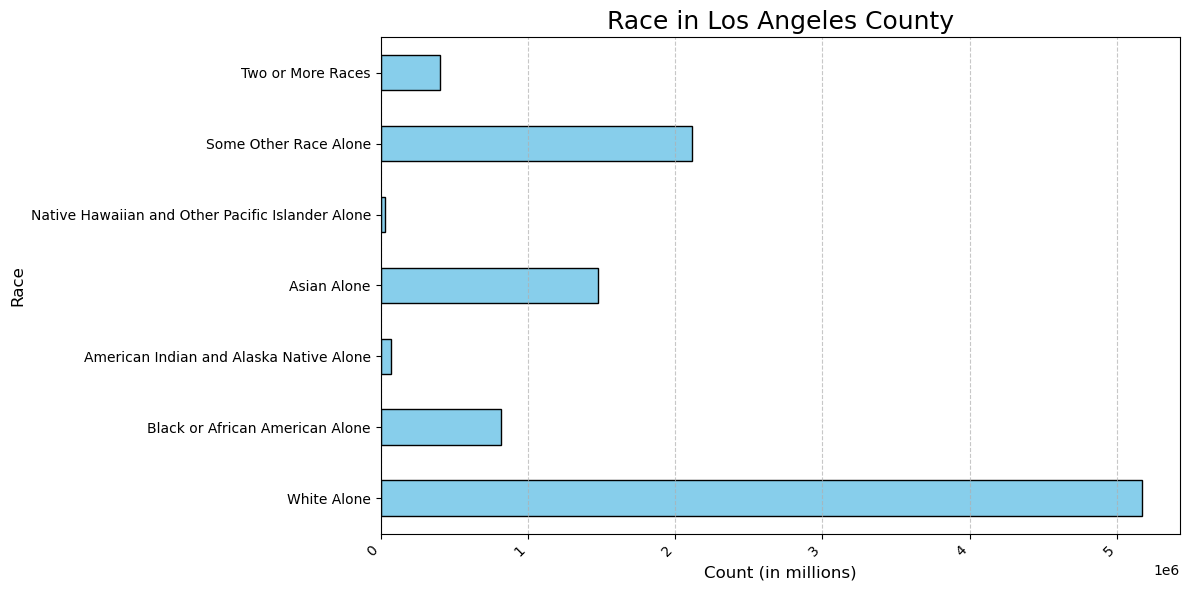

In [62]:
race_columns = [ 
    'White Alone',
    'Black or African American Alone',
    'American Indian and Alaska Native Alone', 
    'Asian Alone',
    'Native Hawaiian and Other Pacific Islander Alone',
    'Some Other Race Alone', 
    'Two or More Races'
]

race_totals = df2[race_columns].sum()

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))
race_totals.plot(kind='barh', color='skyblue', edgecolor='black')

# Customize the plot
plt.title("Race in Los Angeles County", fontsize=18)
plt.xlabel("Count (in millions)", fontsize=12)
plt.ylabel("Race", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Import Housing Burden Data

### Filter and clean data 

In [48]:
burden_df = pd.read_csv(
    'Data/Burden_Data.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [49]:
burden_df.sample(5)

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
4251,6073019302,7692,San Diego,92056,Oceanside,-117.276226,33.217975,23.87,46.41,45-50%,...,47.68,29.7,53.48,3.2,19.59,24.3,78.11,43.28,4.49,40.07
7020,6085507701,3534,Santa Clara,95014,Cupertino,-122.049360,37.318599,9.43,11.50,10-15%,...,48.19,11.1,12.69,1.6,3.58,6.6,3.60,18.02,1.87,5.96
7511,6073007502,3319,San Diego,92107,San Diego,-117.248910,32.747805,6.28,5.31,5-10%,...,7.38,25.5,45.36,3.0,17.11,15.1,39.20,17.84,1.85,5.89
6586,6019005507,5503,Fresno,93720,Fresno,-119.756760,36.859257,11.66,16.97,15-20%,...,39.21,14.2,20.10,3.7,26.86,9.9,13.56,27.10,2.81,15.95
14,6037227010,5705,Los Angeles,90011,Los Angeles,-118.246997,34.018526,76.65,99.82,95-100% (highest scores),...,94.79,68.6,96.86,8.4,77.76,39.5,98.44,86.20,8.94,97.37


In [51]:
burden_df2 = burden_df[burden_df["California County"] == "Los Angeles"]

In [52]:
burden_df2.sample(5)

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
6103,6037920118,6035,Los Angeles,91384,Castaic,-118.622562,34.459253,14.00,23.06,20-25%,...,25.55,8.4,6.92,5.3,48.26,4.5,0.85,21.69,2.25,9.51
565,6037119002,7976,Los Angeles,91331,Los Angeles,-118.427535,34.246925,55.40,92.88,90-95%,...,84.29,25.4,45.20,6.3,60.57,19.3,60.10,64.94,6.74,72.84
3971,6037901008,2744,Los Angeles,93536,Lancaster,-118.174811,34.696642,25.53,49.94,45-50%,...,33.94,31.2,55.69,7.6,72.53,19.6,61.25,56.19,5.83,59.87
7851,6037670702,5649,Los Angeles,90275,Rancho Palos Verdes,-118.328443,33.753600,3.53,1.02,1-5% (lowest scores),...,36.46,3.9,0.63,1.7,4.23,1.7,0.05,8.84,0.92,0.69
305,6037535606,2007,Los Angeles,90280,South Gate,-118.225285,33.947656,60.76,96.15,95-100% (highest scores),...,94.87,52.2,84.40,7.7,73.41,23.2,74.79,75.86,7.87,87.83


In [57]:
burden_df2 = burden_df[burden_df["California County"] == "Los Angeles"][["Census Tract", "California County", "Longitude", "Latitude", "Housing Burden"]]

In [58]:
burden_df2.sample(10)

,Census Tract,California County,Longitude,Latitude,Housing Burden
373,6037121802,Los Angeles,-118.391365,34.219211,22.1
314,6037127102,Los Angeles,-118.444525,34.206007,28.6
3571,6037310202,Los Angeles,-118.295908,34.186585,28.0
5379,6037273402,Los Angeles,-118.479229,33.991782,29.9
260,6037239601,Los Angeles,-118.275298,33.972837,39.0
1857,6037211804,Los Angeles,-118.306607,34.067162,34.3
2862,6037406902,Los Angeles,-117.964118,34.056440,17.4
2804,6037482701,Los Angeles,-118.139748,34.037622,21.9
3230,6037216200,Los Angeles,-118.348242,34.057124,17.2
6638,6037480703,Los Angeles,-118.162776,34.110079,4.8


In [65]:
df2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Census Tract                                      2346 non-null   int64
 1   Total Population                                  2346 non-null   int64
 2   White Alone                                       2346 non-null   int64
 3   Black or African American Alone                   2346 non-null   int64
 4   American Indian and Alaska Native Alone           2346 non-null   int64
 5   Asian Alone                                       2346 non-null   int64
 6   Native Hawaiian and Other Pacific Islander Alone  2346 non-null   int64
 7   Some Other Race Alone                             2346 non-null   int64
 8   Two or More Races                                 2346 non-null   int64
dtypes: int64(9)
memory usage: 165.1 KB


In [69]:
df2["Census Tract"] = df2["Census Tract"].astype(str)
burden_df2["Census Tract"] = burden_df2["Census Tract"].astype(str)

In [72]:
race_burden_df = burden_df2.merge(df2, on="Census Tract")

In [73]:
race_burden_df.sample(5)

,Census Tract,California County,Longitude,Latitude,Housing Burden,Total Population,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races
2258,6037460600,Los Angeles,-118.218217,34.226309,8.3,4416,3072,0,0,988,0,57,299
359,6037123205,Los Angeles,-118.383561,34.194564,30.5,2492,1785,96,36,58,0,445,72
2123,6037621301,Los Angeles,-118.379751,33.835067,13.8,6973,5063,230,0,978,0,43,659
1378,6037650200,Los Angeles,-118.331853,33.862807,10.9,5930,3150,83,36,1657,9,513,482
45,6037534302,Los Angeles,-118.175566,33.959359,32.1,3720,2892,52,6,14,0,743,13


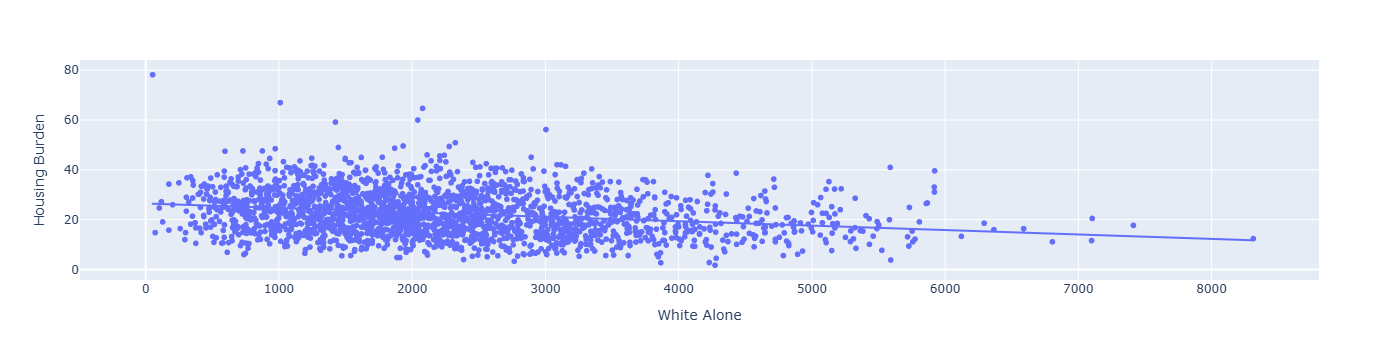

In [79]:
import plotly.express as px

fig = px.scatter(race_burden_df, x="White Alone", y="Housing Burden", trendline="ols")
fig.show()

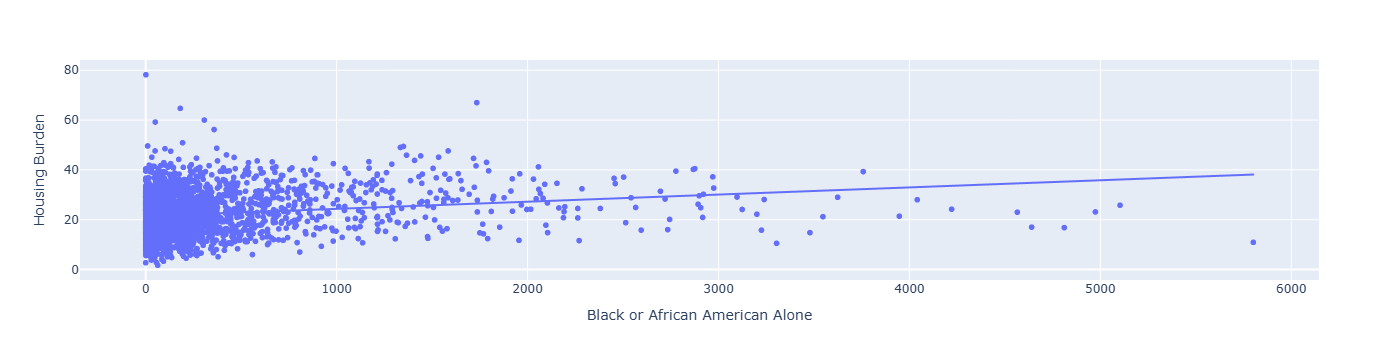

In [112]:
fig = px.scatter(race_burden_df, x="Black or African American Alone", y="Housing Burden", trendline="ols")
fig.show()

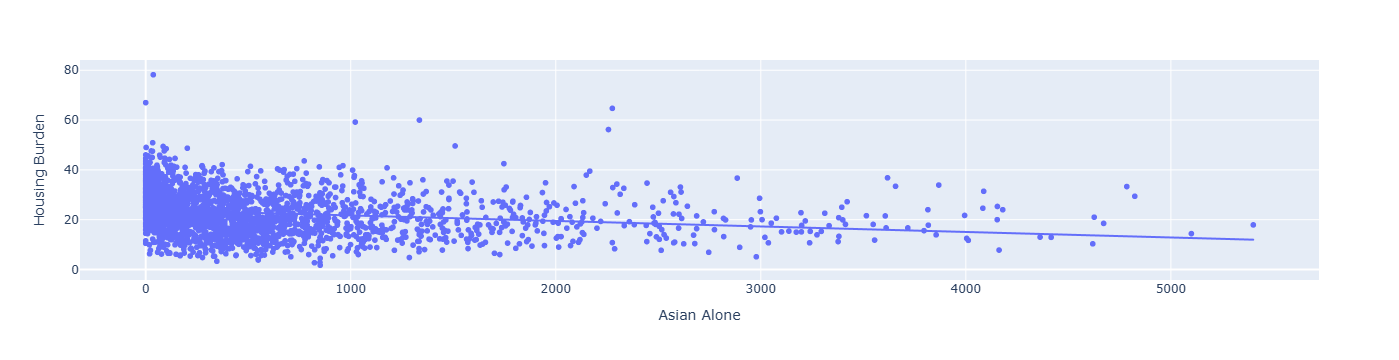

In [115]:
fig = px.scatter(race_burden_df, x="Asian Alone", y="Housing Burden", trendline="ols")
fig.show()

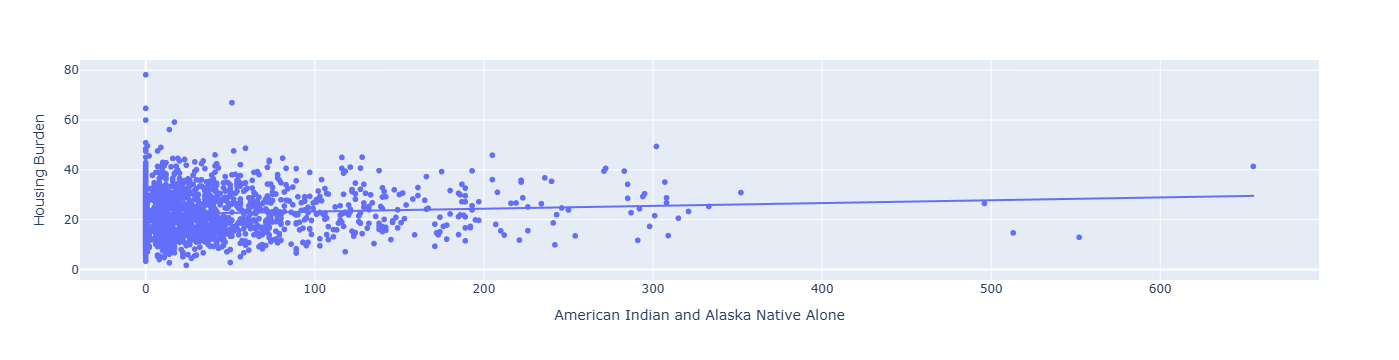

In [114]:
fig = px.scatter(race_burden_df, x="American Indian and Alaska Native Alone", y="Housing Burden", trendline="ols")
fig.show()

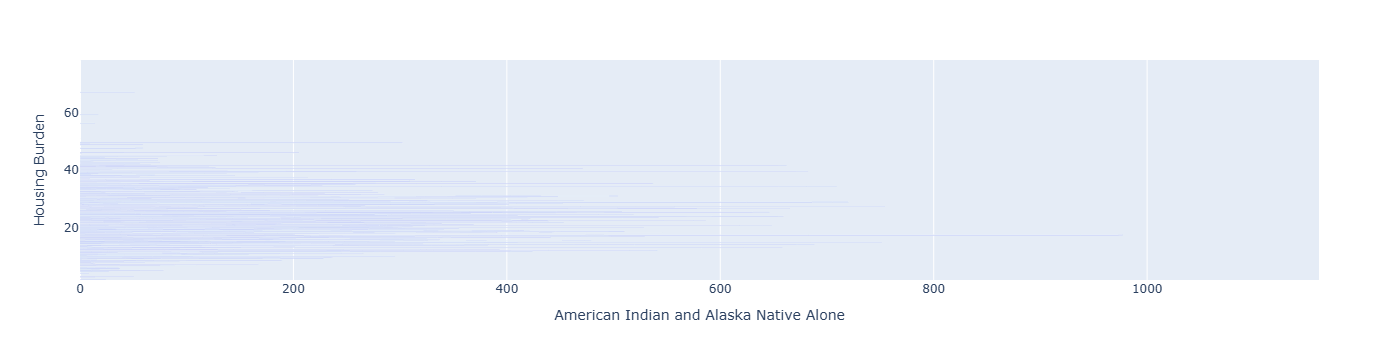

In [113]:
fig = px.bar(race_burden_df, x="Asian Alone", y="Housing Burden", orientation='h')
fig.show()

In [120]:
race_burden_df_sorted = race_burden_df.sort_values(by='Housing Burden',ascending = False)

In [121]:
race_burden_df_sorted.head(10)

,Census Tract,California County,Longitude,Latitude,Housing Burden,Total Population,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races
634,6037980010,Los Angeles,-118.239399,34.078656,78.2,95,52,1,0,37,0,4,1
377,6037234901,Los Angeles,-118.328661,33.981788,67.0,3321,1010,1734,51,0,0,519,7
1760,6037265303,Los Angeles,-118.453411,34.067274,64.7,5156,2078,181,0,2276,43,286,292
1327,6037222700,Los Angeles,-118.285681,34.020920,60.0,4071,2042,307,0,1335,30,239,118
1872,6037265304,Los Angeles,-118.451161,34.067755,59.2,2878,1424,50,17,1022,21,129,215
874,6037224700,Los Angeles,-118.280016,34.026240,56.2,6238,3004,358,14,2257,24,282,299
239,6037229410,Los Angeles,-118.269562,33.992236,50.9,3697,2324,193,0,34,0,1119,27
1729,6037265305,Los Angeles,-118.449023,34.062694,49.6,3990,1932,10,1,1509,0,98,440
73,6037241120,Los Angeles,-118.276835,33.936444,49.4,5146,2278,1350,302,85,0,1083,48
398,6037600303,Los Angeles,-118.298332,33.935595,49.0,3883,1446,1334,9,2,0,989,103


<Axes: xlabel='Census Tract'>

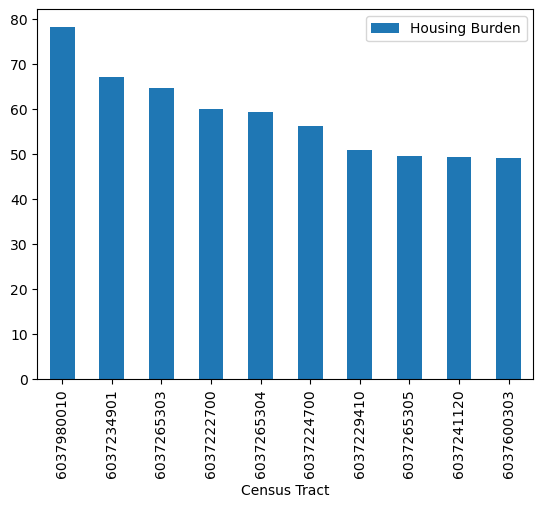

In [122]:
race_burden_df_sorted.head(10).plot.bar(x='Census Tract',
                            y='Housing Burden')